In [167]:
import numpy as np
import pandas as pd
from os import path
import sys
sys.path.append('./')
from create_metrics import read_data,knn_metric,similarity_metric

In [168]:
# Read data sample1.csv
from sklearn import preprocessing
def read_data(path=''):
    df = pd.read_csv(path)
    df = df[['x','y']]    
    # print(df)
    np_array = df.to_numpy(dtype=float)
    np_array = preprocessing.MinMaxScaler().fit_transform(np_array)
    return np_array

np_array= read_data('../sample2.csv')

np_array

array([[0.13989678, 0.60027175],
       [0.23813266, 0.36542533],
       [0.12286145, 0.23686741],
       ...,
       [0.80250074, 0.72741914],
       [0.83483586, 0.5855547 ],
       [0.80566277, 0.19389512]])

In [169]:

# Create distance matrix
distance_metric = similarity_metric.Euclidean_similarity_metric(np_array)
distance_metric

array([[0.        , 0.25456459, 0.3638034 , ..., 0.67469287, 0.6950949 ,
        0.77999123],
       [0.25456459, 0.        , 0.17266902, ..., 0.67048553, 0.6360123 ,
        0.59288535],
       [0.3638034 , 0.17266902, 0.        , ..., 0.83818289, 0.79277386,
        0.68415222],
       ...,
       [0.67469287, 0.67048553, 0.83818289, ..., 0.        , 0.14550285,
        0.53353339],
       [0.6950949 , 0.6360123 , 0.79277386, ..., 0.14550285, 0.        ,
        0.39274457],
       [0.77999123, 0.59288535, 0.68415222, ..., 0.53353339, 0.39274457,
        0.        ]])

In [170]:
# Create similarity matrix
similarity_metrix = np.zeros((len(distance_metric),len(distance_metric)))
for i in range(0,len(distance_metric)):
    for j in range(0,len(distance_metric)):
        similarity_metrix[i][j] = 1/(1+distance_metric[i][j])
        
similarity_metrix

array([[1.        , 0.79708929, 0.73324351, ..., 0.59712441, 0.58993747,
        0.56180052],
       [0.79708929, 1.        , 0.85275554, ..., 0.59862835, 0.61124235,
        0.62779158],
       [0.73324351, 0.85275554, 1.        , ..., 0.54401551, 0.55779484,
        0.59377056],
       ...,
       [0.59712441, 0.59862835, 0.54401551, ..., 1.        , 0.87297906,
        0.65208883],
       [0.58993747, 0.61124235, 0.55779484, ..., 0.87297906, 1.        ,
        0.71800675],
       [0.56180052, 0.62779158, 0.59377056, ..., 0.65208883, 0.71800675,
        1.        ]])

In [171]:
# Create K- nearest neighbor:
from create_metrics import knn_metric

knn_result = knn_metric.Knn_metric(similarity_metrix,k=5)
knn_result

array([[ 282,  136,  805,  149,  566],
       [ 222,  559, 1447,  345,  739],
       [ 138,  484,  882,  204,   68],
       ...,
       [3107, 3523, 3987, 3544, 3091],
       [3204, 3913, 3590, 3907, 3512],
       [3617, 3630, 3540, 3227, 3723]])

In [172]:
knn_result.shape

(4000, 5)

In [173]:
# Create Graph

from graph_partitioning import create_Graphnetworkx
graph = create_Graphnetworkx.Graph(knn_result)
G = graph.createGraphFromAjacentList()
print(G)

Graph with 4000 nodes and 11942 edges


In [174]:
# Partitioning using Metis
from graph_partitioning import metis_algorithm,create_subgraph
n_cuts,membership = metis_algorithm.partitionGraph(G,nparts=20,recursive=True)
# print(membership)
print(n_cuts)

313


['#917332', '#F430F2', '#DEC2E0', '#174F08', '#19EF51', '#B68806', '#68F746', '#187E71', '#6C2CA5', '#FAB9AD', '#FE3F12', '#3D3B36', '#B97D98', '#CC7E35', '#DB3C22', '#50907E', '#C42EAB', '#649FA3', '#2522E1', '#95E79D']


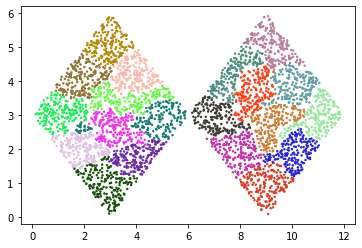

In [176]:
from graph_partitioning import create_subgraph
import networkx as nx
import matplotlib.pyplot as plt
color_map = create_subgraph.make_colorMap(G,membership)
print(create_subgraph.unique(color_map))
# print(color_map)

df= pd.read_csv('../sample2.csv')
df = df[['x','y']]
df
plt.scatter(df['x'],df['y'],c=color_map,s=2)
# nx.draw(G,with_labels=False,node_color=color_map,node_shape="s",node_size=10)
plt.show()

In [177]:
# from graph_partitioning import create_subgraph

# subgraphs = create_subgraph.make_subgraphs(G,membership=membership)
# for g in subgraphs:
#     print(g)

In [178]:
from typing import List

def new_subgraphs(G:nx.Graph,membership:list,knn_result:np.array):
    graphs_label = set(membership)
    list_subgraphs = [None]*len(graphs_label)
    for sub_id in graphs_label:
        temp = nx.Graph()
        for i in range (0,len(membership)):
            if (sub_id == membership[i]):
                temp.add_node(i)
        # for 
    return graphs_label

a = new_subgraphs(G,membership,knn_result)
print(a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [179]:
components = nx.connected_components(G)
from graph_partitioning import create_subgraph
print(G)
G1 = create_subgraph.removeEdges(G,membership)
# print(G)

# components = nx.connected_components(G)
# tmp_graphs = [None]*200
# for n in components:
#     print(n)

# for g in tmp_graphs:
#     print(g)
S = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
for g in S:
    print(g)

Graph with 4000 nodes and 11942 edges
Edges removed:  313
Graph with 199 nodes and 574 edges
Graph with 200 nodes and 563 edges
Graph with 200 nodes and 579 edges
Graph with 200 nodes and 581 edges
Graph with 200 nodes and 586 edges
Graph with 200 nodes and 591 edges
Graph with 201 nodes and 565 edges
Graph with 29 nodes and 84 edges
Graph with 200 nodes and 587 edges
Graph with 199 nodes and 584 edges
Graph with 172 nodes and 495 edges
Graph with 200 nodes and 571 edges
Graph with 199 nodes and 579 edges
Graph with 199 nodes and 588 edges
Graph with 200 nodes and 581 edges
Graph with 201 nodes and 603 edges
Graph with 200 nodes and 589 edges
Graph with 199 nodes and 582 edges
Graph with 202 nodes and 599 edges
Graph with 201 nodes and 577 edges
Graph with 199 nodes and 571 edges


<p>Now consider each subgraph is a sub cluster, make a membership list as follow </p>

In [180]:
memb = [0]* G.number_of_nodes()
l = len(S)
start = 0
for g in S:
    for node in g.nodes():
        memb[node] = start
    start = start + 1

# print(memb)

['#ED54B1', '#D9F81E', '#C6352F', '#0AECCE', '#7B62B7', '#C8900E', '#790A19', '#ACDC0F', '#AD1C61', '#D95D0F', '#CFBAB0', '#760083', '#360831', '#BD3F68', '#CA38A0', '#CBC381', '#AE19C0', '#AAB5C9', '#9C45B6', '#72760A', '#2467EC']


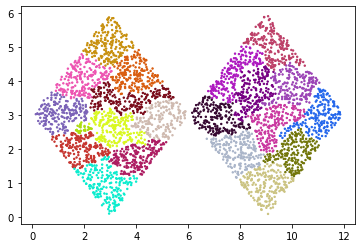

In [181]:
color_map = create_subgraph.make_colorMap(G,memb)
print(create_subgraph.unique(color_map))
# print(color_map)

df= pd.read_csv('../sample2.csv')
df = df[['x','y']]
df
plt.scatter(df['x'],df['y'],c=color_map,s=2)
# nx.draw(G,with_labels=False,node_color=color_map,node_shape="s",node_size=10)
plt.show()

<p>Calculate self-similarity between cluster</p>

In [182]:
from merge_partitions import relative_closeness,relative_interconnectivity,self_similarity

def validation(G:nx.Graph(),subgraphs:list,sub_g1: nx.Graph(),sub_g2: nx.Graph(),membership:list):
    ri = relative_interconnectivity.RI(G,subgraphs,sub_g1,sub_g2,membership)
    rc = relative_closeness.RC(G,subgraphs,sub_g1,sub_g2,membership)
    score = self_similarity.get_selfsimilarity(rc,ri,2)
    # print(score)
    return score

i = 0
j = 0
np_similarity = np.zeros((len(S),len(S)))
for i in range (0,len(S)):
    for j in range(i+1,len(S)):
        np_similarity[i][j] = validation(G,S,S[i],S[j],memb)
        np_similarity[j][i] = np_similarity[i][j]
        # print(i,j,':', sc)

np_similarity



array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.23077592e-02, 5.68628792e-02, 3.01539264e+00, 0.00000000e+00,
        0.00000000e+00, 6.40000000e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.89629630e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.98660508e-01, 7.71948927e-04,
        1.56250000e-02, 0.00000000e+00, 9.73497302e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.89629630e-02, 0.00000000e+00, 3.28016729e-01,
        9.83965015e-03, 0.00000000e+00, 0.00000000e+00, 1.09786982e-03,
        2.96296296e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.0000

In [183]:
def get_2most_similarity_clusters(nparray:np.array):
    x = 0
    y = 0
    number_of_clusters = len(nparray)
    # print(number_of_clusters)
    maxindex = nparray.argmax()
    x = int(maxindex/number_of_clusters)
    y = maxindex - x*number_of_clusters
    return x,y


# maxindex = np_similarity.argmax()
# maxindex
# print(np.amax(np_similarity))
# np_similarity[52][55]

In [191]:
# Merge 2 similarity cluster until have 5 clusters
from merge_partitions import merge_graphs
while(len(S)>2):
    x,y = get_2most_similarity_clusters(np_similarity)
    print(x,y,np_similarity[x][y])
    id1 = x
    id2 = y
        
    G1 = merge_graphs.merge_subgraphs(G,G1,id1,id2,membership=memb)
    S = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]

    # new labels
    memb = [0]* G.number_of_nodes()
    l = len(S)
    start = 0
    for g in S:
        for node in g.nodes():
            memb[node] = start
        start = start + 1

    print('Len S: ',len(S))
    # New self-similarity
    i = 0
    j = 0
    np_similarity = np.zeros((len(S),len(S)))
    for i in range (0,len(S)):
        for j in range(i+1,len(S)):
            np_similarity[i][j] = validation(G,S,S[i],S[j],memb)
            np_similarity[j][i] = np_similarity[i][j]
    print(G1)

3 4 0.7110042735042734
Len S:  4
Graph with 4000 nodes and 11780 edges
0 1 0.028182311372267198
Len S:  3
Graph with 4000 nodes and 11784 edges
1 2 0.009544480618860785
Len S:  2
Graph with 4000 nodes and 11791 edges


In [192]:
S = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
for g in S:
    print(g)

Graph with 2000 nodes and 5875 edges
Graph with 2000 nodes and 5916 edges


['#A07CEA', '#08BDA0']


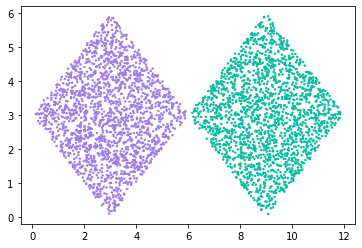

In [193]:
memb= [0]* G1.number_of_nodes()
l = len(S)
start = 0
for g in S:
    for node in g.nodes():
        memb[node] = start
    start = start + 1
color_map = create_subgraph.make_colorMap(G,memb)
print(create_subgraph.unique(color_map))
# print(color_map)

df= pd.read_csv('../sample2.csv')
df = df[['x','y']]
df
plt.scatter(df['x'],df['y'],c=color_map,s=2)
# nx.draw(G,with_labels=False,node_color=color_map,node_shape="s",node_size=10)
plt.show()